In [166]:
import pandas as pd
import os
import re
import pickle
import spacy
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from sklearn.utils.extmath import randomized_svd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('../data/text_df.csv')

In [77]:
df.head()

,folder,extension,filename,absolute_path,size_mb,created_on,last_modified_on,unix_permission,raw_text,lemmatized_text,stemmed_text
1,../data/t5/,.text,000083.text,../data/t5/000083.text,0.007671,2011-02-08 15:37:52,2011-02-08 15:37:52,-rw-r--r--,PUBLIC NOTICE\n FEDERAL COMMUNICATIONS COMMISS...,public NOTICE FEDERAL COMMUNICATIONS COMMISS...,public notic feder communic commiss 1919 m str...
2,../data/t5/,.text,000086.text,../data/t5/000086.text,0.026270,2011-02-08 15:37:52,2011-02-08 15:37:52,-rw-r--r--,"Time,F-Scale,Location,County,State,Lat,Lon,Com...","Time , F - Scale , Location , County , State ,...","time , f - scale , locat , counti , state , la..."
3,../data/t5/,.text,000087.text,../data/t5/000087.text,0.023494,2011-02-08 15:37:52,2011-02-08 15:37:52,-rw-r--r--,**********************************************...,* * * * * * * * * * * * * * * * * * * * * * * ...,* * * * * * * * * * * * * * * * * * * * * * * ...
4,../data/t5/,.text,000088.text,../data/t5/000088.text,0.004139,2011-02-08 15:37:52,2011-02-08 15:37:52,-rw-r--r--,76 APPENDIX.\n able...,76 APPENDIX . ab...,76 appendix . abl timber land be tributari to ...
5,../data/t5/,.text,000089.text,../data/t5/000089.text,0.036176,2011-02-08 15:37:52,2011-02-08 15:37:52,-rw-r--r--,WASHINGTON CONGRESSIONAL DISTRICTS BY SCHOOL D...,WASHINGTON congressional district by school di...,washington congression district by school dist...


In [3]:
# filenames without text
files_w_text = df[df['raw_text'].isna()]
pickle.dump(list(files_w_text['filename'].values), open('../data/file_w_text.pkl', 'wb'))
df.drop(index=files_w_text.index, inplace=True)

In [4]:
nlp = spacy.load('en_core_web_lg')

In [41]:
def lemmatizing(text):        
    sent = []
    doc = nlp(text.replace('\n', ' '))
    
    for word in doc:
        sent.append(word.lemma_)
    
    return " ".join(sent)

In [64]:
def stemming(text):
    stemmer = nltk.stem.SnowballStemmer('english', ignore_stopwords=True)
    stemmer.stopwords = stopwords.words('english')
    
    stemmed_words = []
    
    for w in text.split():
        stemmed_words.append(stemmer.stem(w))
        
    text = ' '.join(stemmed_words)
        
    return text

In [65]:
#df['lemmatized_text'] = df['raw_text'].apply(lemmatizing)
df['stemmed_text'] = df['lemmatized_text'].apply(stemming)

In [160]:
params = {
    'vectorizer': {
        'analyzer': 'word',
        'stop_words': stopwords.words('english'),
        'ngram_range': (1, 1),
        'token_pattern': '[a-z]{3,}',
        'min_df': 0.01,
        'lowercase': True
    },
    'raw_documents': df['stemmed_text'],
    'components': 4,
}

In [162]:
tfidf = TfidfVectorizer(**params['vectorizer'])
X_tfidf = tfidf.fit_transform(raw_documents=params['raw_documents'])

tfidf_doc_word = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names())
tfidf_doc_word

,aaa,aaron,abandon,abat,abbrevi,abc,abil,abl,abnorm,aboard,...,york,young,youth,zealand,zero,zhang,zinc,zip,zone,zoolog
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.014429,0.0
1,0.0,0.011112,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.023322,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.028447,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.014431,0.0
3245,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.003255,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.025657,0.005814,0.000000,0.0,0.000000,0.0
3246,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.021552,0.0,0.000000,0.0
3247,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.006952,0.0,0.0,0.0,0.004225,0.000000,0.000000,0.0,0.000000,0.0


In [79]:
k = 80
U, Sigma, VT = randomized_svd(X_tfidf, 
                              n_components=k,
                              n_iter=5,
                              random_state=None)

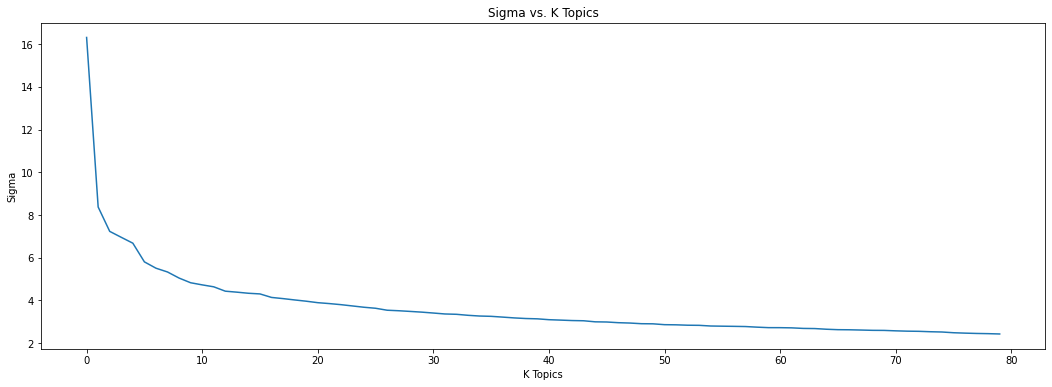

In [80]:
plt.figure(figsize=(18, 6))
plt.title("Sigma vs. K Topics")
plt.ylabel("Sigma")
plt.xlabel("K Topics")
sns.lineplot(range(k), Sigma)
plt.savefig("sigma_topics_tfidf.png");

In [113]:
pair_sig_topic = list(zip(Sigma, range(k)))
for i in range(k):
    print(pair_sig_topic[i][0])
    if str(pair_sig_topic[i][0])[:3] == str(pair_sig_topic[i + 1][0])[:3]:#(pair_sig_topic[i][0] / pair_sig_topic[i + 1][0]) == 1.0:
        print(pair_sig_topic[i][0], pair_sig_topic[i + 1][0])
        print(pair_sig_topic[i][1], pair_sig_topic[i + 1][1])
        print(pair_sig_topic[i + 2])
        print(str(pair_sig_topic[i + 2][0])[:3])
        break

16.30925385134171
8.37415085291225
7.233445803091631
6.955098827608723
6.680845514294957
5.806425641405236
5.5103954313425225
5.333065816695816
5.048809508959956
4.82890131983988
4.729819785939646
4.638975439333133
4.434589885012695
4.388542170739309
4.388542170739309 4.337117389480354
13 14
(4.30627316043063, 15)
4.3


In [116]:
from sklearn.decomposition import NMF

# Use NMF to look for 15 topics
n_topics = 15
model = NMF(n_components=n_topics)
model.fit(X_tfidf)

# Print the top 10 words
n_words = 10
feature_names = tfidf.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: pron say would one get make work peopl like know
Topic 1: beam use system model figur measur magnet temperatur test energi
Topic 2: var document function length link src window location url els
Topic 3: los del con est son car www gov part especi
Topic 4: shall section commiss requir cost propos applic amend act regul
Topic 5: generic drug product name prefer medic use market price patient
Topic 6: court appeal pron state defend district claim case attorney judg
Topic 7: water speci plant area soil habitat fish river site beach
Topic 8: imag nasa src space new mission earth star scienc view
Topic 9: font color size text famili san none weight margin background
Topic 10: health program servic child develop medic educ patient manag nation
Topic 11: file data datum gov inform name contact map date search
Topic 12: inc com john citi street new william jame corp robert
Topic 13: offset earth atmospher mass center site email load east alon
Topic 14: felix storm wind gov august septe

In [163]:
%%time

from sklearn.decomposition import LatentDirichletAllocation

# Beware it will try *all* of the combinations, so it'll take ages
search_params = {
  'n_components': [5, 10, 15, 20, 25, 30, 40, 50],
  'learning_decay': [.5, .7]
}

# Set up LDA with the options we'll keep static
model = LatentDirichletAllocation(learning_method='online')

# Try all of the options
gridsearch = GridSearchCV(model, param_grid=search_params, n_jobs=-1, verbose=1)
gridsearch.fit(X_tfidf)

# What did we find?
print("Best Model's Params: ", gridsearch.best_params_)
print("Best Log Likelihood Score: ", gridsearch.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  8.7min finished


Best Model's Params:  {'learning_decay': 0.7, 'n_components': 5}
Best Log Likelihood Score:  -56073.69316230924
CPU times: user 9.2 s, sys: 191 ms, total: 9.39 s
Wall time: 8min 50s


In [164]:
gridsearch.best_params_

{'learning_decay': 0.7, 'n_components': 5}

In [165]:
%%time

# Use LDA to look for 5 topics
learning_decay, n_topics = gridsearch.best_params_.values()
model = LatentDirichletAllocation(learning_method='online', n_components=n_topics, learning_decay=learning_decay)
model.fit(X_tfidf)

# Print the top 10 words per topic
n_words = 10
feature_names = tfidf.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: microphon nomin tool larson pascal factori data locat calibr scan
Topic 1: offset mass atmospher earth center pascal creator meteorolog displac site
Topic 2: lon lat rad complement scanner auto shot config knot pixel
Topic 3: pron use state system new may servic program inform water
Topic 4: que los para del las font por una con est
CPU times: user 9.22 s, sys: 49.6 ms, total: 9.27 s
Wall time: 9.34 s


In [138]:
# Convert our counts into numbers
amounts = model.transform(X_tfidf) * 100

# Set it up as a dataframe
topics = pd.DataFrame(amounts, columns=topic_list)
topics.head(2)

,topic_los_del_con,topic_kill_august_best,topic_pron_use_state,topic_jan_mar_jame,topic_imag_figur_beam
0,2.515538,2.515888,89.894152,2.521503,2.552920
1,3.777736,2.430572,88.794978,2.475805,2.520909


In [144]:
import scipy
from sklearn.metrics import pairwise

In [148]:
scipy.spatial.distance.

In [147]:
pairwise.PAIRWISE_DISTANCE_FUNCTIONS.keys()

dict_keys(['cityblock', 'cosine', 'euclidean', 'haversine', 'l2', 'l1', 'manhattan', 'precomputed', 'nan_euclidean'])

In [149]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: '", topic_names[ix], "'")
        print(", ".join([feature_names[i]
                         for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [150]:
display_topics(model, feature_names, 15)


Topic  1
los, del, con, est, font, son, car, san, especi, grand, normal, van, familiar, favor, alcohol

Topic  2
kill, august, best, realiz, thank, magnet, employ, orbit, prefer, walk, bad, draft, tale, especi, favor

Topic  3
pron, use, state, may, servic, court, program, new, provid, inform, year, drug, water, requir, includ

Topic  4
jan, mar, jame, john, william, robert, david, michael, richard, thoma, charl, smith, joseph, paul, edward

Topic  5
imag, figur, beam, temperatur, var, magnet, model, fig, measur, use, surfac, layer, datum, coat, nasa


In [155]:
label = df['stemmed_text'].index
doc_topic = pd.DataFrame(model.fit_transform(tfidf.fit_transform(df['stemmed_text'])).round(5),
                         index = label,
                         columns=['topic{}'.format(i + 1) for i in range(n_topics)])

df['top_topic'] = doc_topic.idxmax(axis=1)

In [159]:
df[['top_topic', 'absolute_path']].groupby(by='top_topic').count()

,absolute_path
top_topic,
topic1,127
topic3,57
topic4,3058
topic5,7


In [168]:
df[['top_topic', 'absolute_path']]

,top_topic,absolute_path
1,topic4,../data/t5/000083.text
2,topic4,../data/t5/000086.text
3,topic4,../data/t5/000087.text
4,topic4,../data/t5/000088.text
5,topic4,../data/t5/000089.text
...,...,...
3655,topic4,../data/t5/004995.pdf
3656,topic4,../data/t5/004996.pdf
3657,topic4,../data/t5/004997.pdf
3658,topic4,../data/t5/004998.pdf


In [157]:
df.columns

Index(['folder', 'extension', 'filename', 'absolute_path', 'size_mb',
       'created_on', 'last_modified_on', 'unix_permission', 'raw_text',
       'lemmatized_text', 'stemmed_text', 'top_topic'],
      dtype='object')